# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

Dataset source: https://www.kaggle.com/xwolf12/malicious-and-benign-websites

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


Understanding the characteristics:
* URL: it is the anonymous identification of the URL analyzed in the study
* URL_LENGTH: it is the number of characters in the URL
* NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
* CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
* SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
* CONTENT_LENGTH: it represents the content size of the HTTP header.
* WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
* WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
* WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYYY HH:MM
* WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
* TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
* DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
* REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
* APP_BYTES: this is the number of bytes transferred
* SOURCE_APP_PACKETS: packets sent from the honeypot to the server
* REMOTE_APP_PACKETS: packets received from the server
* APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
* DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
* TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites


source: https://medium.com/analytics-vidhya/analysis-of-malicious-websites-by-its-characteristics-e202a20d9e38

In [4]:
#check the data types of each feature
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
#shows the name of the columns in the dataframe
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

**Which columns contain the features of the websites?**

**The columns are:**

* URL 
* URL_LENGTH 
* NUMBER_SPECIAL_CHARACTERS 
* SERVER
* CONTENT_LENGTH
* WHOIS_COUNTRY
* WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE
* TCP_CONVERSATION_EXCHANGE
* DIST_REMOTE_TCP_PORT 
* REMOTE_IPS 
* APP_BYTES
* SOURCE_APP_PACKETS
* REMOTE_APP_PACKETS 
* SOURCE_APP_BYTES 
* REMOTE_APP_BYTES
* APP_PACKETS 
* DNS_QUERY_TIMES


**Which column contains the feature we will predict?  What is the code standing for benign vs malicious websites?**
<p>The column type is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

**Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?**


In [6]:
#the columns that are categorical are of the type object
#shows only the name of the columns of the type object
categ_col = (websites.select_dtypes(include=['object'])).columns.tolist()

In [7]:
#function that returns unique values of a column in a dtaframe
def unique_col_val(x):
    return websites[x].unique()

In [8]:
list_unique_col_val =[]

#i'm appending the unique values to an empty list to understand how they look
for i in categ_col:
    list_unique_col_val.append(unique_col_val(i))
    
    

In [9]:
list_unique_col_val

[array(['M0_109', 'B0_2314', 'B0_911', ..., 'B0_162', 'B0_1152', 'B0_676'],
       dtype=object),
 array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
        'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object),
 array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
        'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
        'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
        'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
        'nginx/1.12.0',
        'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
        'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
        'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
        'nginx/1.10.1 + Phusion Passenger 5.0.30',
        'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
        'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
        'tsa_c', 'Apache/2.2.0 (Fedora)', '

In [10]:
#transform list into dataframe
list_dataframe = pd.DataFrame(list_unique_col_val)

list_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780
0,M0_109,B0_2314,B0_911,B0_113,B0_403,B0_2064,B0_462,B0_1128,M2_17,M3_75,...,M4_43,M4_61,M4_39,B0_156,M4_45,M4_48,M4_41,B0_162,B0_1152,B0_676
1,iso-8859-1,UTF-8,us-ascii,ISO-8859-1,utf-8,None,windows-1251,ISO-8859,windows-1252,None,...,None,None,None,None,None,None,None,None,None,None
2,nginx,Apache/2.4.10,Microsoft-HTTPAPI/2.0,None,Apache/2,nginx/1.10.1,Apache,Apache/2.2.15 (Red Hat),Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,openresty/1.11.2.1,...,None,None,None,None,None,None,None,None,None,None
3,None,US,SC,GB,UK,RU,AU,CA,PA,se,...,None,None,None,None,None,None,None,None,None,None
4,None,AK,TX,Mahe,CO,FL,Kansas,Novosibirskaya obl.,CA,Tennessee,...,None,None,None,None,None,None,None,None,None,None


In [11]:
#By the output above we need to transpose to have a similar format to the dataframe websites for reasons of readability
list_dataframe_transposed = list_dataframe.T

#check the dataframe after being transposed
list_dataframe_transposed.head()

,0,1,2,3,4,5,6
0,M0_109,iso-8859-1,nginx,None,None,10/10/2015 18:21,None
1,B0_2314,UTF-8,Apache/2.4.10,US,AK,None,12/09/2013 0:45
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,SC,TX,7/10/1997 4:00,11/04/2017 0:00
3,B0_113,ISO-8859-1,None,GB,Mahe,12/05/1996 0:00,3/10/2016 3:45
4,B0_403,utf-8,Apache/2,UK,CO,3/08/2016 14:30,1/07/2016 0:00


In [12]:
#To be easy to understand the dataframe i'm going to assing the original labels to the columns

#Assign the names to the columns
list_dataframe_transposed.columns = categ_col

list_dataframe_transposed.head()

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
0,M0_109,iso-8859-1,nginx,None,None,10/10/2015 18:21,None
1,B0_2314,UTF-8,Apache/2.4.10,US,AK,None,12/09/2013 0:45
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,SC,TX,7/10/1997 4:00,11/04/2017 0:00
3,B0_113,ISO-8859-1,None,GB,Mahe,12/05/1996 0:00,3/10/2016 3:45
4,B0_403,utf-8,Apache/2,UK,CO,3/08/2016 14:30,1/07/2016 0:00


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

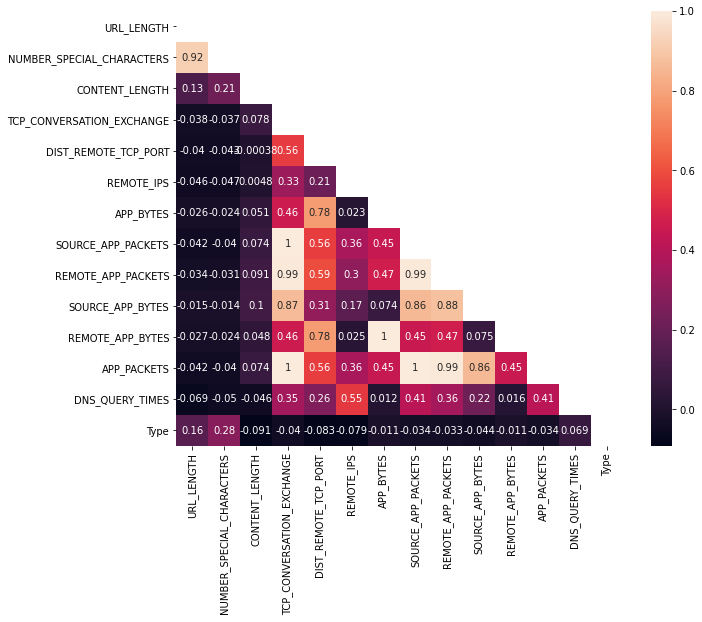

In [13]:
# Your code here

import matplotlib.pyplot as plt
import seaborn as sns

#gets rid of all the columns that are not ordinal
websites_ord = websites.drop(categ_col,axis=1,inplace=False)

#creates a correlation matrix 
corr_matrix = websites_ord.corr()

# creating mask
mask = np.triu(np.ones_like(websites_ord.corr()))

#defining the size/dimensions of the plot
plt.figure(figsize=(10,8))

# plotting a triangle correlation heatmap
sns.heatmap(corr_matrix,annot=True,mask=mask)

#displays the plot
plt.show()

In [14]:
# Your comment here

#The columns TCP_CONVERSATION_EXCHANGE , SOURCE_APP_PACKETS, REMOTE_APP_PACKETS  need to be remove due to high collinearity
#the two first have 100% and the last 99% correlation with the column APP_PACKETS.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

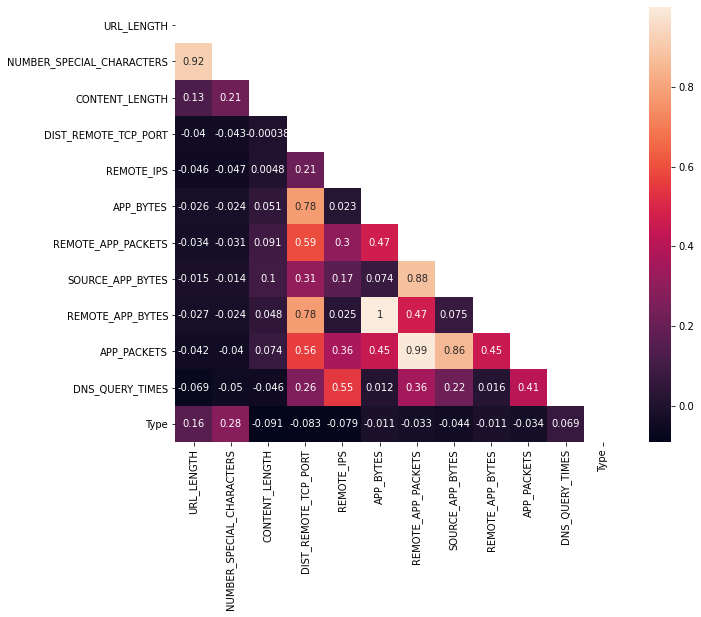

In [15]:
# Your code here

#remove one of the higly correlated columns
Remove_col_colliner = websites_ord.drop(['TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS'],axis=1)

#creates a correlation matrix 
corr_matrix2 = Remove_col_colliner.corr()

# creating mask
mask = np.triu(np.ones_like(corr_matrix2))

#defining the size/dimensions of the plot
plt.figure(figsize=(10,8))

# plotting a triangle correlation heatmap
sns.heatmap(corr_matrix2,annot=True,mask=mask)

#displays the plot
plt.show()

In [16]:
# Your comment here
#After removing the columns it didn't change the correlation value for the last higly correlated column

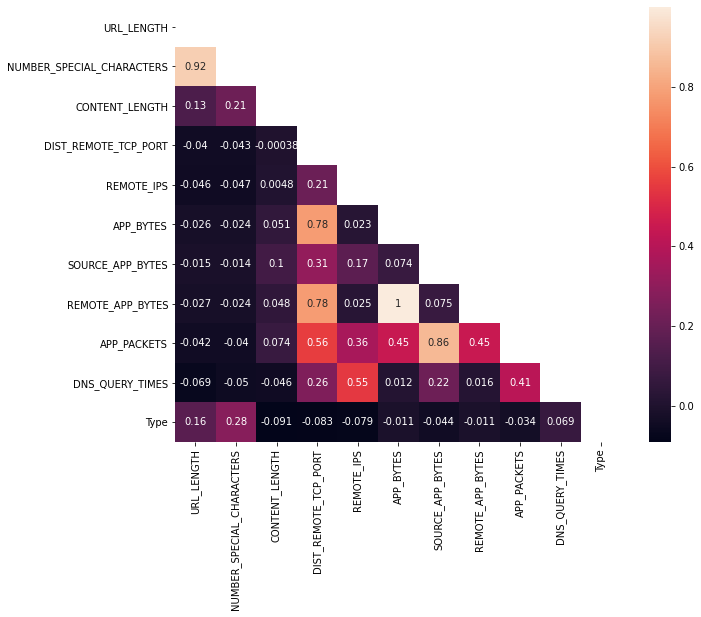

In [17]:
# Print heatmap again

#remove one of the higly correlated columns
Remove_col_colliner = websites_ord.drop(['TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS'],axis=1)

#creates a correlation matrix 
corr_matrix2 = Remove_col_colliner.corr()

# creating mask
mask = np.triu(np.ones_like(corr_matrix2))

#defining the size/dimensions of the plot
plt.figure(figsize=(10,8))

# plotting a triangle correlation heatmap
sns.heatmap(corr_matrix2,annot=True,mask=mask)

#displays the plot
plt.show()

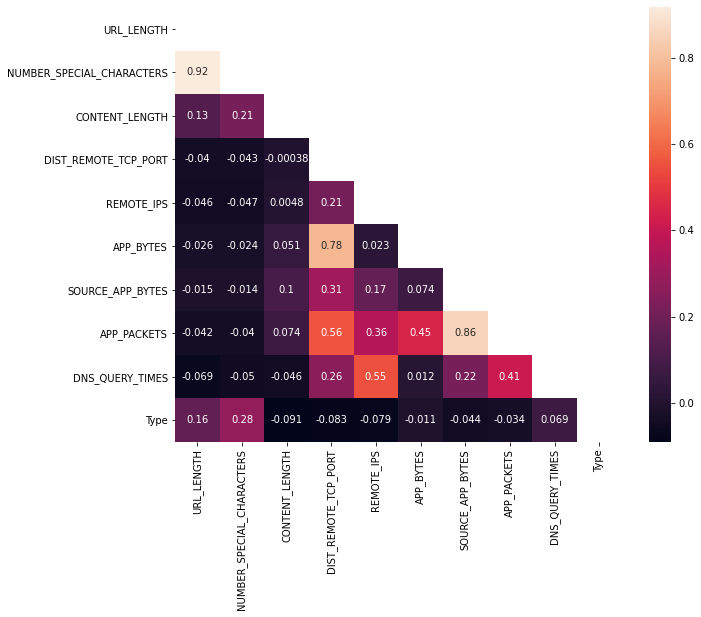

In [18]:
#looking at the heatmap above we can see that APP_Bytes and Remote_APP_BYTES have identical correlation values with the other columns
# based on that we could drop one of the columns, i'm going to choose the column Remote_APP_BYTES to drop

#remove one of the higly correlated columns
Remove_col_colliner = websites_ord.drop(['TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','REMOTE_APP_BYTES'],axis=1)

#creates a correlation matrix 
corr_matrix2 = Remove_col_colliner.corr()

# creating mask
mask = np.triu(np.ones_like(corr_matrix2))

#defining the size/dimensions of the plot
plt.figure(figsize=(10,8))

# plotting a triangle correlation heatmap
sns.heatmap(corr_matrix2,annot=True,mask=mask)

#displays the plot
plt.show()

In [19]:
#websites 2 is the dataframe where the columns with high collineratity where removed,
#and have the columns with categorical values

websites2 = websites.drop(['TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','REMOTE_APP_BYTES'],axis=1)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [20]:
# Your code here
websites2.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [21]:
proportion = (websites2['CONTENT_LENGTH'].isnull().sum()) / len(websites2['CONTENT_LENGTH'])*100
print('The proportion of the missing values in CONTENT_LENGTH to the total number of values in the column is',"{:.0f}".format(proportion),'%')

The proportion of the missing values in CONTENT_LENGTH to the total number of values in the column is 46 %


In [22]:
#because the proportion of values is high i'm going to drop the column

websites2 = websites2.drop('CONTENT_LENGTH',axis =1)

#another way of syntax to drop the column
#websites2 = websites2.drop(columns=['CONTENT_LENGTH'])

websites2.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [23]:
# Your code here
websites2[websites2['SERVER'].isnull()==True]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1306,B0_2134,66,11,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,2,4,1026,246,15,0.0,0


In [24]:
websites2[websites2['DNS_QUERY_TIMES'].isnull()==True]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1659,B0_772,101,15,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,2,2,276,416,4,NaN,0


In [25]:
#this is going to output the number of rows that is the same for the column DNS_QUERY_TIMES
websites2['SERVER'].shape[0]

1781

In [26]:
#drop the rows with missing values
websites2 = websites2.drop([1306,1659])

In [27]:
# Your comment here
#The SERVER column is categorical and removing 1 row in a total of 1781 it doesn't 
#have a significateve effect in the model we want to create

#for the column DNS_QUERY_TIMES removing 1 row in a total of 1781 it doesn't 
#have a significateve effect in the model we want to create

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [28]:
# Examine missing values in each column
#check if there is not missing values
websites2.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [29]:
# Your code here

#List out the unique values of WHOIS_COUNTRY

websites2['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [30]:
#replace the values to consolidate the country values with consistent country codes

websites2['WHOIS_COUNTRY'].replace(to_replace= ['United Kingdom',"[u'GB'; u'UK']"],value = 'GB', inplace = True)

websites2['WHOIS_COUNTRY'].replace(to_replace= ['Cyprus','se','ru'],value = ['CY','SE','RU'], inplace = True)

In [31]:
# check if all the country values have now consistent country codes
websites2['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'us', 'KR',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY',
       'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


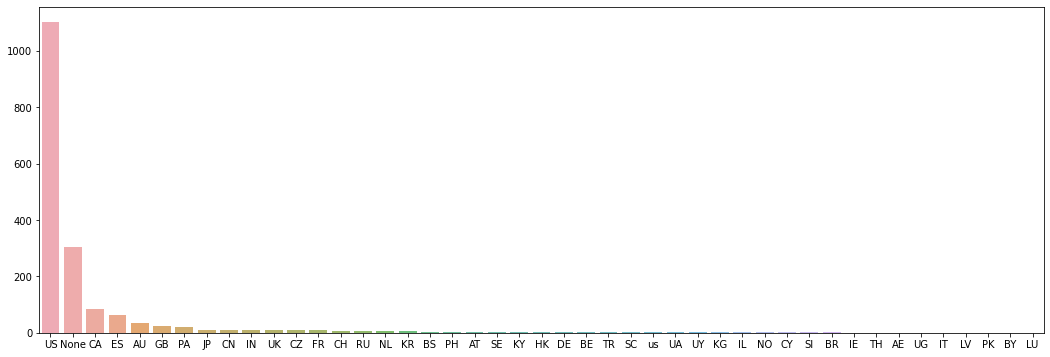

In [32]:
# Your code here
city_count = websites2['WHOIS_COUNTRY'].value_counts()

plt.figure(figsize=(18,6))
sns.barplot(city_count.index, city_count.values, alpha=0.8)

#displays the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


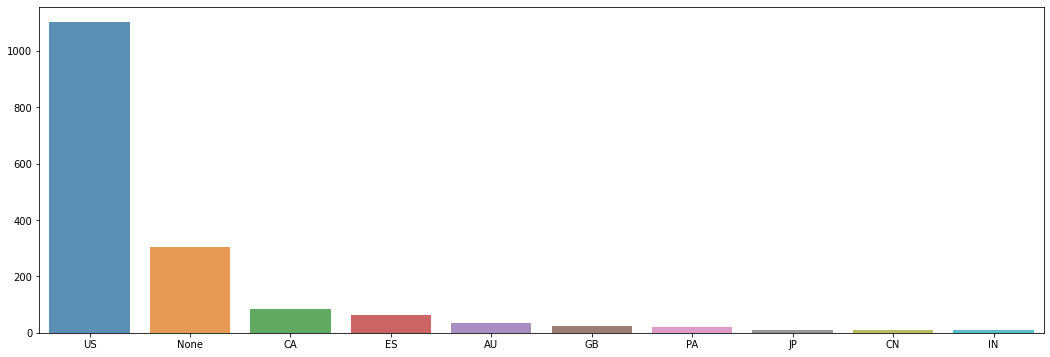

In [33]:
city_count = websites2['WHOIS_COUNTRY'].value_counts()

#get only the top 10 values of the column WHOIS_COUNTRY
city_count_top10 = city_count[:10]

plt.figure(figsize=(18,6))
sns.barplot(city_count_top10.index, city_count_top10.values, alpha=0.8)

#displays the plot
plt.show()

In [34]:
# creates a list with the top 10 countrys
top10_country_list = list(city_count_top10.index)

#### After verifying, now let's keep the top 10 values of the column and re-label the other column values with `OTHER`.

In [35]:
# Your code here
websites2['WHOIS_COUNTRY'] = websites2['WHOIS_COUNTRY'].apply(lambda x: 'OTHER' if x not in top10_country_list else x)

In [36]:
websites2['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'OTHER', 'GB', 'AU', 'CA', 'PA', 'IN', 'JP', 'CN',
       'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [37]:
# Your code here
col_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

websites2.drop(columns = col_to_drop, inplace= True ) 

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [38]:
# Your code here
websites2.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [39]:
# Your code here
websites2.drop(columns = ['URL'], inplace= True ) 

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [40]:
# Your code here
websites2['CHARSET'].value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
windows-1252      1
ISO-8859          1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Don't read the instructions that come next, before you think of your own solution.

In [41]:
# Your code here
websites2['SERVER'].value_counts()

Apache                                                                                385
nginx                                                                                 211
None                                                                                  175
Microsoft-HTTPAPI/2.0                                                                 113
cloudflare-nginx                                                                       94
                                                                                     ... 
Apache/2.2.22 (Debian) mod_python/3.3.1 Python/2.7.3 mod_ssl/2.2.22 OpenSSL/1.0.1t      1
mw2240.codfw.wmnet                                                                      1
Apache/2.2.23 (Amazon)                                                                  1
nxfps                                                                                   1
Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/1.0.1e-fips mod_bwlimited/1.4               1
Name: SERV

In [42]:
websites2['SERVER'].head(40)

0                                                 nginx
1                                         Apache/2.4.10
2                                 Microsoft-HTTPAPI/2.0
3                                                 nginx
4                                                  None
5                                                 nginx
6                                              Apache/2
7                                 Microsoft-HTTPAPI/2.0
8                                          nginx/1.10.1
9                                          nginx/1.10.1
10                                               Apache
11                                Microsoft-HTTPAPI/2.0
12                                                 None
13                                                nginx
14                              Apache/2.2.15 (Red Hat)
15    Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...
16                                                nginx
17                                Microsoft-HTTP

![Think Hard](../images/think-hard.jpg)

In [43]:
# Your comment here
#Use a regex method to have the main servers that apear more times (nginx,Apache,Microsoft)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [44]:
# Your code here
#get only the strings that contain the sub string nginx in the column SERVER
nginx_df = websites2[websites2['SERVER'].str.contains('nginx',regex = True)]

nginx_df['SERVER'].unique()

array(['nginx', 'nginx/1.10.1', 'nginx/1.12.0', 'cloudflare-nginx',
       'nginx/1.6.2', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30', 'nginx/0.7.65',
       'nginx/1.1.19', 'nginx/1.4.3', 'nginx/1.11.3', 'nginx/1.11.2',
       'nginx/1.10.0 (Ubuntu)', 'nginx/1.8.1', 'nginx/1.11.10',
       'nginx/1.4.6 (Ubuntu)', 'nginx + Phusion Passenger',
       'nginx/0.8.54', 'nginx/1.13.0', 'nginx/1.10.3', 'nginx/1.10.2',
       'nginx/1.2.1', 'nginx/0.8.35', 'nginx/1.10.0',
       'nginx/1.6.3 + Phusion Passenger', 'nginx/1.2.6', 'nginx/1.4.4',
       'nginx/1.6.3', 'nginx/1.7.4', 'nginx/0.8.38', 'nginx/1.9.13',
       'nginx/0.8.55', 'nginx/1.7.12'], dtype=object)

In [45]:
#np.where works in the way that first is the condition then the value if condition = True
# and in the end the value if condition = False. 
#condition : websites['SERVER'].str.contains('Microsoft')
#condition = True : Value = 'Microsoft'
#condition = False : Value = 'Other'

np.where(websites['SERVER'].str.contains('Microsoft'),'Microsoft','Other')
                           

array(['Other', 'Other', 'Microsoft', ..., 'Other', 'Other', 'Microsoft'],
      dtype='<U9')

In [46]:
#Note: the variable websites2['SERVER'] that i'm assigning the numpy array have to be websites2 and not websites 
# or it will give an error due to the difference of shape between the two dataframes (websites2 and websites)

websites2['SERVER'] = np.where(websites2['SERVER'].str.contains('Microsoft'),'Microsoft',
                     np.where(websites2['SERVER'].str.contains('Apache'),'Apache', 
                              np.where(websites2['SERVER'].str.contains('nginx'),'nginx','Other')))

In [47]:
# Count `SERVER` value counts here
websites2['SERVER'].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [48]:
#the columns that are categorical are of the type object
#shows only the name of the columns of the type object
categorical_col = websites2.select_dtypes(include=['object']).columns.tolist()

In [49]:
# Your code here
website_dummy = pd.get_dummies(data = websites2, columns = categorical_col)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [50]:
# Your code here
website_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859               uint8
CHARSET_ISO-8859-1             uint8
CHARSET_None                   uint8
CHARSET_UTF-8                  uint8
CHARSET_iso-8859-1             uint8
CHARSET_us-ascii               uint8
CHARSET_utf-8                  uint8
CHARSET_windows-1251           uint8
CHARSET_windows-1252           uint8
SERVER_Apache                  uint8
SERVER_Microsoft               uint8
SERVER_Other                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_AU               uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_GB               uint8
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [51]:
from sklearn.model_selection import train_test_split

# Your code here:

#Spliting the target and the features
y = website_dummy['Type']
X = website_dummy.drop('Type',axis=1)

#splitting the data to train and test, selecting 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [52]:
# Your code here:
from sklearn.linear_model import LogisticRegression as LR



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [53]:
# Your code here:

#fit the LogisticRegression  model to our training data
model_LR = LR().fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [54]:
# Your code here:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

# once the algorithm has learned, we can use it to predict on new instances:
y_pred = model_LR.predict(X_test)

print('The confusion matrix  of the model is:\n',confusion_matrix(y_test,y_pred))
print('The accuracy score of the model is',accuracy_score(y_test,y_pred))

The confusion matrix  of the model is:
 [[303  11]
 [ 29  13]]
The accuracy score of the model is 0.8876404494382022


![confusion_matrix.png](../images/confusion_matrix.png)

In [55]:
#test if there is overfiting is the algorithm is memorizing the training data whet will be a problem because if we introduce
#new data it will not predict well

# the natural thing to do is to perform an evaluation of how well our model behaves with test data

# once the model is trained, i can call the score method, to compare results of test predictions with actual values -> returns the accuracy
print("test data accuracy was ",model_LR.score(X_test,y_test))

# you should always also see the accuracy of the training
print("train data accuracy was ", model_LR.score(X_train, y_train))


test data accuracy was  0.8876404494382022
train data accuracy was  0.8981026001405481


What are your thoughts on the performance of the model? Write your conclusions below.

In [56]:
# Your conclusions here:
#Since the test data accuracy and train data accuracy are similar, the model is not overfited
#The mode have a good accuracy score but we have 27 False negatives what means that 27 of the websites that are malignous
# are not detected by the model


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [74]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier as KNC

# initialize the model -> set hyperparameters
model_KNC = KNC(n_neighbors=3)

#fit the KNeighborsClassifier  model to our training data
model_KNC = model_KNC.fit(X_train,y_train)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [75]:
# Your code here:
# once the algorithm has learned, we can use it to predict on new instances:
y_pred = model_KNC.predict(X_test)

print('The confusion matrix  of the model is:\n',confusion_matrix(y_test,y_pred))
print('The accuracy score of the model is',accuracy_score(y_test,y_pred))


The confusion matrix  of the model is:
 [[302  12]
 [ 13  29]]
The accuracy score of the model is 0.9297752808988764


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [76]:
# Your code here:
# initialize the model -> set hyperparameters
model_KNC = KNC(n_neighbors=5)

#fit the KNeighborsClassifier  model to our training data
model_KNC = model_KNC.fit(X_train,y_train)

# once the algorithm has learned, we can use it to predict on new instances:
y_pred = model_KNC.predict(X_test)

print('The confusion matrix  of the model is:\n',confusion_matrix(y_test,y_pred))
print('The accuracy score of the model is',accuracy_score(y_test,y_pred))

The confusion matrix  of the model is:
 [[301  13]
 [ 13  29]]
The accuracy score of the model is 0.9269662921348315


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [60]:
# Your conclusions here:
# The increase in the k form 3 to 5 lead to a decrease in the accuracy and looking at the confusion matrix for k= 5
#the true positives have on less value and the False postives have one more value


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [61]:
# Your code here